# Introduction to Keras Tuner

In [2]:
# Import necessary libaries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

## Train a NN model as our baseline

In [3]:
tf.random.set_seed(1)  # For reproducibility

In [4]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# Split training set into train-validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=1
)

In [6]:
# Build training/testing pipelines
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

In [7]:
# Normalize images
X_train, y_train = normalize_img(X_train, y_train)
X_test, y_test = normalize_img(X_test, y_test)
X_val, y_val = normalize_img(X_val, y_val)

In [9]:
# Build model

inp = tf.keras.layers.Input(shape=(28, 28, 1))
b = tf.keras.layers.Flatten()(inp)
b = tf.keras.layers.Dense(16, activation="relu")(b)
out = tf.keras.layers.Dense(10, activation="softmax")(b)

model = tf.keras.Model(inp, out)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile model
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(),
)

In [11]:
# Model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
hist = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=tf.keras.callbacks.EarlyStopping(patience=2),
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.7670 - loss: 0.8019 - val_accuracy: 0.9149 - val_loss: 0.2950
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.9201 - loss: 0.2830 - val_accuracy: 0.9276 - val_loss: 0.2538
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.9331 - loss: 0.2405 - val_accuracy: 0.9339 - val_loss: 0.2323
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9411 - loss: 0.2133 - val_accuracy: 0.9376 - val_loss: 0.2174
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.9468 - loss: 0.1949 - val_accuracy: 0.9399 - val_loss: 0.2082
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.9507 - loss: 0.1817 - val_accuracy: 0.9422 - val_loss: 0.2026
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.9528 - loss: 0.1719 - val_accuracy: 0.9442 - val_loss: 0.1977
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.9546 -

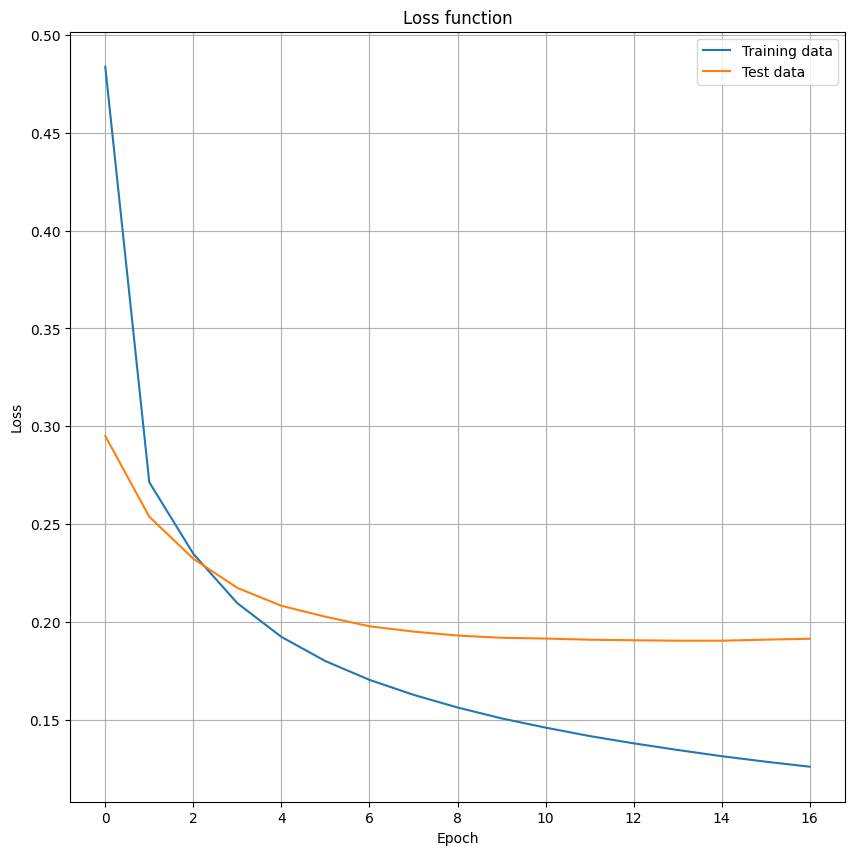

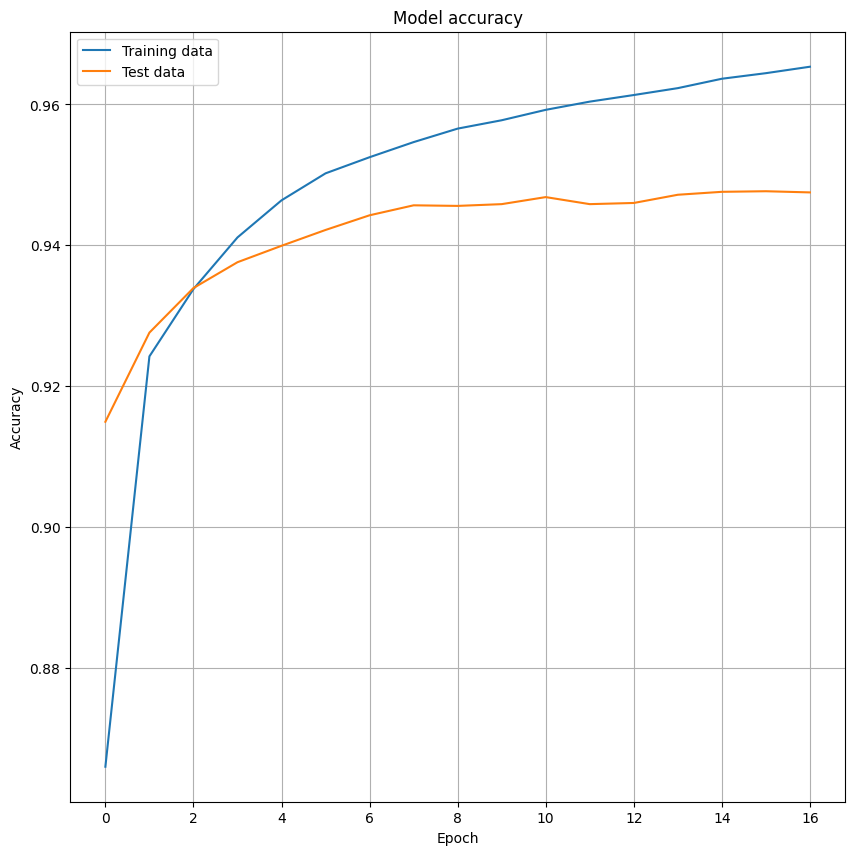

In [14]:
# Plot the training progress
fig = plt.figure(figsize=(10, 10))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss function")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid()
plt.legend(["Training data", "Test data"])
plt.show()

fig = plt.figure(figsize=(10, 10))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.grid()
plt.legend(["Training data", "Test data"])
plt.show()

In [15]:
# Evaluate the model (we do no hyperparameter tuning here)
loss_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {}".format(loss_accuracy[0]))
print("Test Accuracy: {}".format(loss_accuracy[1]))

Test Loss: 0.19377358257770538
Test Accuracy: 0.9480999708175659


## Keras Tuner

In [16]:
# Import keras tuner
import keras_tuner as kt

### Using the Sequential API

In [17]:
# Define hyperband model for tuning
def build_model(hp):
    model = tf.keras.models.Sequential()  # define the sequential model

    model.add(tf.keras.layers.Flatten())  # flatten the input image

    number_of_hidden_layers = hp.Int(
        "num_layers", 1, 3
    )  # Define the range of number of layers, here, it is from 1 to 3

    for i in range(number_of_hidden_layers):
        model.add(
            tf.keras.layers.Dense(
                hp.Int("units", min_value=16, max_value=128, step=16),
                activation="relu",
                kernel_initializer="he_normal",
            ),
        )

    model.add(tf.keras.layers.Dense(10, activation="softmax"))  # output layer

    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss="sparse_categorical_crossentropy",
        metrics=["acc"],
    )

    return model

In [18]:
tuner = kt.Hyperband(
    build_model, objective="val_acc", max_epochs=200, factor=3, overwrite=True
)  # define how the hyperparameter tuning should occur

In [19]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

# Hyperparameter searching - it is similar to the .fit method
tuner.search(
    X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[stop_early]
)

Trial 23 Complete [00h 00m 04s]
val_acc: 0.9575833082199097

Best val_acc So Far: 0.969083309173584
Total elapsed time: 00h 02m 08s


In [21]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)

In [22]:
history = best_model.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=stop_early
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8662 - loss: 0.4377 - val_acc: 0.9573 - val_loss: 0.1408
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9619 - loss: 0.1216 - val_acc: 0.9632 - val_loss: 0.1156
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9759 - loss: 0.0800 - val_acc: 0.9628 - val_loss: 0.1239
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9816 - loss: 0.0598 - val_acc: 0.9663 - val_loss: 0.1198


In [25]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.12081186473369598
Test accuracy: 0.9659000039100647


### Let's try Functional API to write the `build_model`

In [30]:
# Define hyperband model for tuning
def build_model(hp):

    inp = tf.keras.layers.Input(shape=(28, 28, 1))
    x = tf.keras.layers.Flatten()(inp)  # flatten the input image

    number_of_hidden_layers = hp.Int(
        "num_layers", 1, 3
    )  # Define the range of number of layers, here, it is from 1 to 3

    for i in range(number_of_hidden_layers):
        x = tf.keras.layers.Dense(
            hp.Int("units", min_value=16, max_value=128, step=16),
            activation="relu",
            kernel_initializer="he_normal",
        )(x)

    out = tf.keras.layers.Dense(10, activation="softmax")(x)  # output layer

    # Define model
    model = tf.keras.models.Model(inp, out)
    
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss="sparse_categorical_crossentropy",
        metrics=["acc"],
    )

    return model

In [31]:
tuner = kt.Hyperband(
    build_model, objective="val_acc", max_epochs=200, overwrite=True
)  # define how the hyperparameter tuning should occur

stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

# Hyperparameter searching - it is similar to the .fit method
tuner.search(
    X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[stop_early]
)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=stop_early
)

test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Trial 22 Complete [00h 00m 04s]
val_acc: 0.9495833516120911

Best val_acc So Far: 0.9704166650772095
Total elapsed time: 00h 02m 08s
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8687 - loss: 0.4377 - val_acc: 0.9587 - val_loss: 0.1319
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9656 - loss: 0.1144 - val_acc: 0.9678 - val_loss: 0.1059
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9779 - loss: 0.0753 - val_acc: 0.9696 - val_loss: 0.1053
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9839 - loss: 0.0535 - val_acc: 0.9704 - val_loss: 0.1089
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9878 - loss: 0.0399 - val_acc: 0.9725 - val_loss: 0.1076
Test loss: 0.0935460552573204
Test accuracy: 0.9742000102996826


### More Hyperparameter Tuning: `num_layers`, `units`, `dropout_rate`, `learning_rate`

#### Warning: This training takes more than an hour to complete

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model-building function
def build_model(hp):
    inp = tf.keras.layers.Input(shape=(28, 28, 1))
    x = tf.keras.layers.Flatten()(inp)

    number_of_hidden_layers = hp.Int("num_layers", 1, 3)

    for i in range(number_of_hidden_layers):
        x = tf.keras.layers.Dense(
            hp.Int("units", min_value=16, max_value=128, step=16),
            activation="relu",
            kernel_initializer="he_normal",
        )(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(hp.Float("dropout_rate", min_value=0.0, max_value=0.5, step=0.1))(x)

    out = tf.keras.layers.Dense(10, activation="softmax")(x)

    model = tf.keras.models.Model(inp, out)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["acc"],
    )

    return model

# Define the Hyperband tuner
tuner = kt.Hyperband(
    build_model,
    objective="val_acc",
    max_epochs=200,
    overwrite=True,
    directory="hyperband_tuning",
    project_name="mnist_tuning",
)

# Define callbacks
stop_early = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    "best_model.h5", # Save the best model to this file
    monitor="val_acc", 
    mode="max", # Maximize validation accuracy
    save_best_only=True, 
)

# Perform hyperparameter search
tuner.search(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    callbacks=[stop_early, checkpoint],
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[stop_early, checkpoint],
)

# Evaluate the best model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Trial 254 Complete [00h 00m 33s]
val_acc: 0.9437500238418579

Best val_acc So Far: 0.9797499775886536
Total elapsed time: 01h 10m 28s
Best hyperparameters: {'num_layers': 3, 'units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.000660722499375456, 'tuner/epochs': 67, 'tuner/initial_epoch': 23, 'tuner/bracket': 4, 'tuner/round': 3, 'tuner/trial_id': '0133'}
Epoch 1/50
1478/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7536 - loss: 0.7944

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.7551 - loss: 0.7895 - val_acc: 0.9492 - val_loss: 0.1621
Epoch 2/50
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9222 - loss: 0.2549

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9222 - loss: 0.2549 - val_acc: 0.9553 - val_loss: 0.1403
Epoch 3/50
1471/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9402 - loss: 0.1963

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9402 - loss: 0.1961 - val_acc: 0.9620 - val_loss: 0.1203
Epoch 4/50
1489/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9499 - loss: 0.1616

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9500 - loss: 0.1615 - val_acc: 0.9670 - val_loss: 0.1052
Epoch 5/50
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9563 - loss: 0.1415

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9563 - loss: 0.1415 - val_acc: 0.9694 - val_loss: 0.1006
Epoch 6/50
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9605 - loss: 0.1243

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9605 - loss: 0.1243 - val_acc: 0.9726 - val_loss: 0.0908
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9653 - loss: 0.1111 - val_acc: 0.9717 - val_loss: 0.0927
Epoch 8/50
1482/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9671 - loss: 0.1055

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9671 - loss: 0.1055 - val_acc: 0.9743 - val_loss: 0.0868
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9700 - loss: 0.0928 - val_acc: 0.9743 - val_loss: 0.0873
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9737 - loss: 0.0857 - val_acc: 0.9742 - val_loss: 0.0882
Epoch 11/50
1475/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9719 - loss: 0.0857

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9719 - loss: 0.0856 - val_acc: 0.9748 - val_loss: 0.0860
Epoch 12/50
1472/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9770 - loss: 0.0731

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9770 - loss: 0.0731 - val_acc: 0.9762 - val_loss: 0.0879
Epoch 13/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9767 - loss: 0.0711 - val_acc: 0.9743 - val_loss: 0.0890
Epoch 14/50
1491/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9778 - loss: 0.0691

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9778 - loss: 0.0691 - val_acc: 0.9763 - val_loss: 0.0868
Epoch 15/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9801 - loss: 0.0611 - val_acc: 0.9739 - val_loss: 0.0976
Epoch 16/50
1482/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9805 - loss: 0.0609

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9805 - loss: 0.0609 - val_acc: 0.9765 - val_loss: 0.0889
Test loss: 0.06945481896400452
Test accuracy: 0.9785000085830688


In [35]:
# Print hyperparameters
print(f"Best hyperparameters: {best_hps.values}")


Best hyperparameters: {'num_layers': 3, 'units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.000660722499375456, 'tuner/epochs': 67, 'tuner/initial_epoch': 23, 'tuner/bracket': 4, 'tuner/round': 3, 'tuner/trial_id': '0133'}


In [36]:
# Best model summary
best_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,456 (1.55 MB)

 Trainable params: 135,562 (529.54 KB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 271,126 (1.03 MB)